 [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course). 

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)


## Imports and Configuration
We'll Start by importing the packages we use and setting some notebook defaults. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm.notebook import tqdm
import warnings
import random

from scipy import stats     # norm, skew, kurtosis, boxcox
from scipy import special  # boxcox1p, inv_boxcox, inv_boxcox1p

### sklearn 
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_regression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, LogisticRegression,RidgeCV, LassoLars, BayesianRidge, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, PowerTransformer, StandardScaler, PolynomialFeatures, scale
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# xgboost
from xgboost import XGBRegressor

In [2]:
random.seed(42)
np.random.seed(42)

tqdm().pandas()
pd.set_option('display.max_colwidth', None)
pd.set_option('use_inf_as_na', True)
sns.set_style( 'whitegrid' )

# Set Matplotlib defaults
#plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Mute warnings
warnings.filterwarnings('ignore')

#Limiting floats output to 3 decimal points
pd.set_option(
    'display.float_format',
    lambda x: '{:.3f}'.format(x)
) 

0it [00:00, ?it/s]

## Set up code checking
os.symlink() method is used to create symbolic link. This method creates symbolic link pointing to source named destination.

In [3]:
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 

### Fast Run!

In [4]:
"""
# Remove rows with missing target, separate target from predictors
df_train = pd.read_csv("../input/train.csv", index_col=0)
df_test = pd.read_csv("../input/test.csv", index_col=0)

x = df_train.dropna(axis=0, subset=['SalePrice'])
y = df_train.SalePrice
x = df_train.drop(['SalePrice'], axis=1)

# Select numerical columns
categorical_features = x.select_dtypes(include=np.object).columns.tolist()
numerical_features = x.select_dtypes(include='number').columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=200, learning_rate=0.09))
])

pipeline.fit(x, y)

Save_Submit(pipeline, df_test)
""";

#### Let's read our train dataset.

In [5]:
# Read the data
df = pd.read_csv(
    "../input/train.csv", 
    index_col=0
)
#df.reset_index(drop=True, inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [6]:
data_description = {
    'SalePrice': 'sale price in dollars (our target)',
    'MSSubClass': 'The building class',
    'MSZoning': 'The general zoning classification',
    'LotFrontage': 'Linear feet of street connected to property',
    'LotArea': 'Lot size in square feet',
    'Street': 'Type of road access',
    'Alley': 'Type of alley access',
    'LotShape': 'General shape of property',
    'LandContour': 'Flatness of the property',
    'Utilities': 'Type of utilities available',
    'LotConfig': 'Lot configuration',
    'LandSlope': 'Slope of property',
    'Neighborhood': 'Physical locations within Ames city limits',
    'Condition1': 'Proximity to main road or railroad',
    'Condition2': 'Proximity to main road or railroad (if a second is present)',
    'BldgType': 'Type of dwelling',
    'HouseStyle': 'Style of dwelling',
    'OverallQual': 'Overall material and finish quality',
    'OverallCond': 'Overall condition rating',
    'YearBuilt': 'Original construction date',
    'YearRemodAdd': 'Remodel date',
    'RoofStyle': 'Type of roof',
    'RoofMatl': 'Roof material',
    'Exterior1st': 'Exterior covering on house',
    'Exterior2nd': 'Exterior covering on house (if more than one material)',
    'MasVnrType': 'Masonry veneer type',
    'MasVnrArea': 'Masonry veneer area in square feet',
    'ExterQual': 'Exterior material quality',
    'ExterCond': 'Present condition of the material on the exterior',
    'Foundation': 'Type of foundation',
    'BsmtQual': 'Height of the basement',
    'BsmtCond': 'General condition of the basement',
    'BsmtExposure': 'Walkout or garden level basement walls',
    'BsmtFinType1': 'Quality of basement finished area',
    'BsmtFinSF1': 'Type 1 finished square feet',
    'BsmtFinType2': 'Quality of second finished area (if present)',
    'BsmtFinSF2': 'Type 2 finished square feet',
    'BsmtUnfSF': 'Unfinished square feet of basement area',
    'TotalBsmtSF': 'Total square feet of basement area',
    'Heating': 'Type of heating',
    'HeatingQC': 'Heating quality and condition',
    'CentralAir': 'Central air conditioning',
    'Electrical': 'Electrical system',
    '1stFlrSF': 'First Floor square feet',
    '2ndFlrSF': 'Second floor square feet',
    'LowQualFinSF': 'Low quality finished square feet (all floors)',
    'GrLivArea': 'Above grade (ground) living area square feet',
    'BsmtFullBath': 'Basement full bathrooms',
    'BsmtHalfBath': 'Basement half bathrooms',
    'FullBath': 'Full bathrooms above grade',
    'HalfBath': 'Half baths above grade',
    'Bedroom': 'Number of bedrooms above basement level',
    'Kitchen': 'Number of kitchens',
    'KitchenQual': 'Kitchen quality',
    'TotRmsAbvGrd': 'Total rooms above grade (does not include bathrooms)',
    'Functional': 'Home functionality rating',
    'Fireplaces': 'Number of fireplaces',
    'FireplaceQu': 'Fireplace quality',
    'GarageType': 'Garage location',
    'GarageYrBlt': 'Year garage was built',
    'GarageFinish': 'Interior finish of the garage',
    'GarageCars': 'Size of garage in car capacity',
    'GarageArea': 'Size of garage in square feet',
    'GarageQual': 'Garage quality',
    'GarageCond': 'Garage condition',
    'PavedDrive': 'Paved driveway',
    'WoodDeckSF': 'Wood deck area in square feet',
    'OpenPorchSF': 'Open porch area in square feet',
    'EnclosedPorch': 'Enclosed porch area in square feet',
    '3SsnPorch': 'Three season porch area in square feet',
    'ScreenPorch': 'Screen porch area in square feet',
    'PoolArea': 'Pool area in square feet',
    'PoolQC': 'Pool quality',
    'Fence': 'Fence quality',
    'MiscFeature': 'Miscellaneous feature not covered in other categories',
    'MiscVal': '$Value of miscellaneous feature',
    'MoSold': 'Month Sold',
    'YrSold': 'Year Sold',
    'SaleType': 'Type of sale',
    'SaleCondition': 'Condition of sale',
}

y: mu = 180921.20 and sigma = 79415.29, skew = 1.88 kurtosis = 6.51
Log y: mu = 12.02 and sigma = 0.40, skew = 0.12 kurtosis = 0.80
boxcox y: mu = 191.19 and sigma = 27.60, skew = 0.69 kurtosis = 1.31


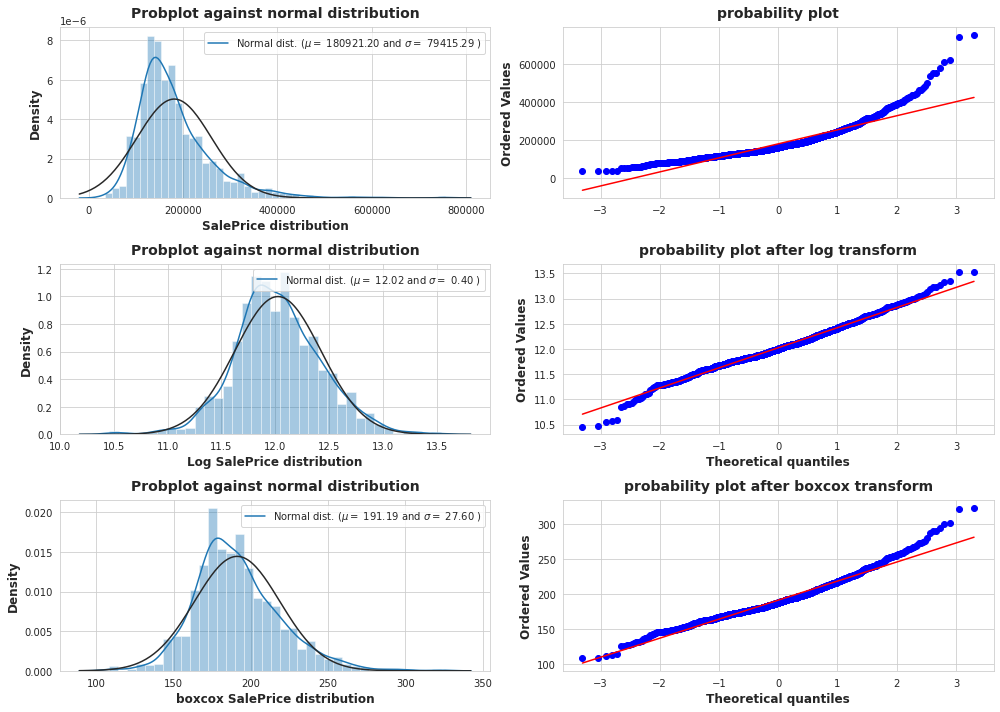

In [7]:
def explore_target( y = df['SalePrice'] ):
    skew_y = stats.skew( y )
    # kurtosis a measure of the combined weight 
    # of a distribution's tails relative to the center of the distribution.
    kurtosis_y = stats.kurtosis( y )
    mu, sigma = stats.norm.fit( y )
    print( f"y: mu = {mu:.2f} and sigma = {sigma:.2f}, skew = {skew_y:.2f} kurtosis = {kurtosis_y:.2f}")
    #------------
    #log_y = np.log( y )
    log_y = np.log1p( y )
    log_skew_y = stats.skew( log_y )
    log_kurtosis_y = stats.kurtosis( log_y )
    log_mu, log_sigma = stats.norm.fit( log_y )
    print( f"Log y: mu = {log_mu:.2f} and sigma = {log_sigma:.2f}, skew = {log_skew_y:.2f} kurtosis = {log_kurtosis_y:.2f}")
    #------------
    # A Box Cox transformation is a transformation of non-normal dependent variables 
    # into a normal shape.
    #boxcox_y = stats.boxcox( y )[0]
    # try different alpha values "optimized value"  between 0 and 1
    boxcox_y = special.boxcox1p(y, 0.35)
    boxcox_skew_y = stats.skew( boxcox_y )
    boxcox_kurtosis_y = stats.kurtosis( boxcox_y )
    boxcox_mu, boxcox_sigma = stats.norm.fit( boxcox_y )
    print( f"boxcox y: mu = {boxcox_mu:.2f} and sigma = {boxcox_sigma:.2f}, skew = {boxcox_skew_y:.2f} kurtosis = {boxcox_kurtosis_y:.2f}")

    # graph
    fig, axes = plt.subplots( 3, 2, figsize = ( 14, 10 ) );
    
    sns.distplot(y, fit=stats.norm, ax=axes[0,0])
    axes[0,0].set_xlabel('SalePrice distribution');
    axes[0,0].set_title( 'Probplot against normal distribution' );
    axes[0,0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

    prob1 = stats.probplot( y, plot = axes[0,1] );
    axes[0,1].set_xlabel('');
    axes[0,1].set_title( 'probability plot' );
    #-----------------------------------------------------
    sns.distplot(log_y, fit=stats.norm, ax=axes[1,0])
    axes[1,0].set_xlabel('Log SalePrice distribution');
    axes[1,0].set_title( 'Probplot against normal distribution' );
    axes[1,0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(log_mu, log_sigma)], loc='best')

    prob2 = stats.probplot( log_y, plot = axes[1,1] );
    axes[1,1].set_title( 'probability plot after log transform' );
    #-----------------------------------------------------
    sns.distplot(boxcox_y, fit=stats.norm, ax=axes[2,0])
    axes[2,0].set_xlabel('boxcox SalePrice distribution');
    axes[2,0].set_title( 'Probplot against normal distribution' );
    axes[2,0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(boxcox_mu, boxcox_sigma)], loc='best')

    prob3 = stats.probplot( boxcox_y, plot = axes[2,1] );
    axes[2,1].set_title( 'probability plot after boxcox transform' );

explore_target(df['SalePrice'])

curve fit 2: [5.32816799e-04 1.12165929e+01]
curve fit 2: [-1.02504204e-02  1.45549389e+02 -1.32836885e+04]


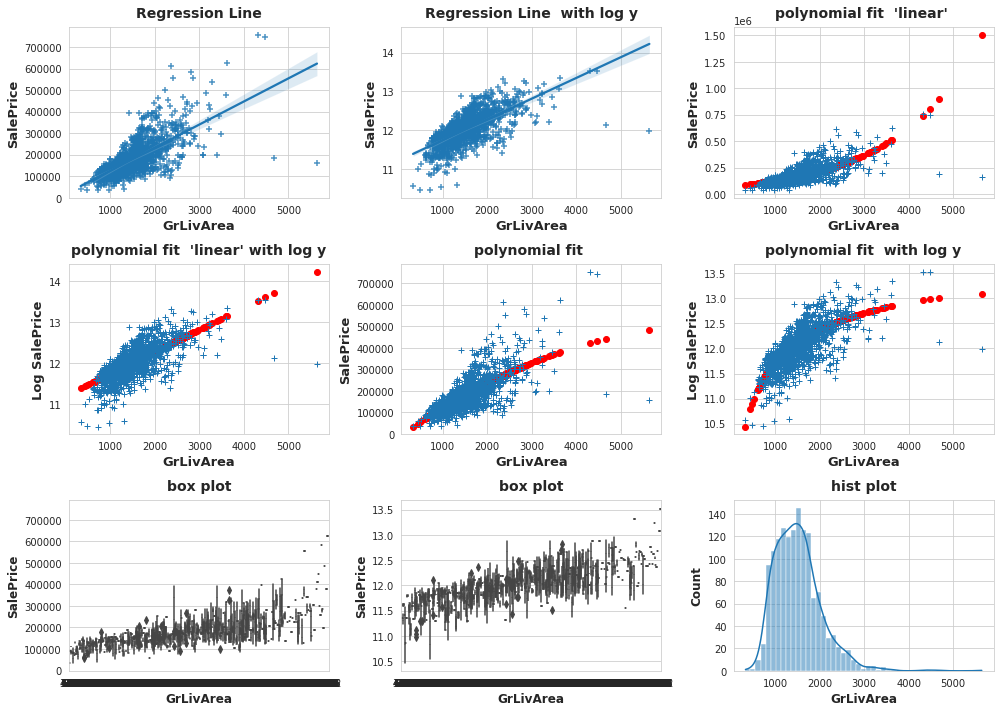

In [8]:
def explore_feature(x, y=df['SalePrice']):
    #log_y = np.log(y)
    log_y = np.log1p(y)
    
    # regression
    m, b = np.polyfit(x, log_y, 1) # m = slope, b = intercept
    reg = m*x+b
     
    # let's try polynomial fit  "linear" 
    curve_fit = np.polyfit(x, log_y, 1)
    print(f"curve fit 2: {curve_fit}")
    y_poly_1 = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*x)
    
    # let's try polynomial fit l"inear with log y"
    curve_fit_gla = np.polyfit(x, y, 2)
    print(f"curve fit 2: {curve_fit_gla}")
    y_poly_2 = curve_fit_gla[2] + curve_fit_gla[1]*x + curve_fit_gla[0]*x**2
    
    # graph
    fig, axes = plt.subplots( 3, 3, figsize = ( 14, 10 ) );
    # -----------------------------------------------------------------
    sns.regplot(x=x, y=y, marker="+", ax=axes[0,0] )
    axes[0,0].set_ylabel(y.name, fontsize=13)
    axes[0,0].set_xlabel(x.name, fontsize=13)
    axes[0,0].set_title( 'Regression Line' );
    
    sns.regplot(x=x, y=log_y, marker="+", ax=axes[0,1] )
    axes[0,1].set_ylabel(y.name, fontsize=13)
    axes[0,1].set_xlabel(x.name, fontsize=13)
    axes[0,1].set_title( 'Regression Line  with log y' );
    
    axes[0,2].scatter(x, y_poly_1, c='red')
    axes[0,2].plot(x, y, "+")
    axes[0,2].set_ylabel(y.name, fontsize=13)
    axes[0,2].set_xlabel(x.name, fontsize=13)
    axes[0,2].set_title( "polynomial fit  'linear' " );
    # -----------------------------------------------------------------
    axes[1,0].scatter(x, np.log(y_poly_1), c='red')
    axes[1,0].plot(x, log_y, "+")
    axes[1,0].set_ylabel(f"Log {y.name}", fontsize=13)
    axes[1,0].set_xlabel(x.name, fontsize=13)
    axes[1,0].set_title( "polynomial fit  'linear' with log y" );

    axes[1,1].scatter(x, y_poly_2, c='red')
    axes[1,1].plot(x, y, "+")
    axes[1,1].set_ylabel(y.name, fontsize=13)
    axes[1,1].set_xlabel(x.name, fontsize=13)
    axes[1,1].set_title( "polynomial fit " );
    
    axes[1,2].scatter(x, np.log(y_poly_2), c='red')
    axes[1,2].plot(x, log_y, "+")
    axes[1,2].set_ylabel(f"Log {y.name}", fontsize=13)
    axes[1,2].set_xlabel(x.name, fontsize=13)
    axes[1,2].set_title( "polynomial fit  with log y" );
    # -----------------------------------------------------------------
    sns.boxplot(x=x, y=y, ax=axes[2,0] )
    axes[2,0].set_xlabel( f"{x.name}" );
    axes[2,0].set_title( 'box plot' );
    
    sns.boxplot(x=x, y=log_y, ax=axes[2,1] )
    axes[2,1].set_xlabel( f"{x.name}" );
    axes[2,1].set_title( 'box plot' );
    
    sns.histplot(x=x, kde=True, ax=axes[2,2] )
    axes[2,2].set_xlabel( f"{x.name}" );
    axes[2,2].set_title( 'hist plot' );
    
explore_feature(df.GrLivArea, df.SalePrice)

Let's create def r_squared function

In [9]:
def r_squared(x, y):
    return np.corrcoef(x, y)[0,1]**2

In [10]:
def gla_feature(x, y):
    def add_gla(row, x=x, y=y):
        p = np.polyfit(x, y, 2)
        return (p[2] + p[1]*row.GrLivArea + p[0]*(row.GrLivArea**2))
    return df.apply(lambda row: add_gla(row), axis=1)

#r_squared( df.GrLivArea, df.SalePrice), r_squared( a, df.SalePrice), 

###  value that shows up only once in the dataset
delete values since the it is guaranteed to create a std of zero. DON'T apply this function in test dataset.

In [11]:
def only_once_values(df):
    X = df.copy()
    n_rows = X.shape[0]
    only_once = {}
    for name in X.select_dtypes(exclude=['number']):
        once = X[name].value_counts() <= 1
        if (once).any():
            #print(f"\n========={name}=============")
            #print(X[name].value_counts())
            # store items that that shows up only once
            only_once[name] = once[once].index.tolist()
            for i in once[once].index.tolist():
                X = X[X[name] != i]
    #print(only_once)
    print(f"{n_rows-X.shape[0]} rows deleted :)")
    return X
        
#df = only_once_values(df)

###  couple of issues here
We need to replace "Brk Comm" items to "BrkComm" and find items that it's GarageYrBlt is earier than YearBuilt.

In [12]:
def Clean(df):
    # replace "Brk Comm" items to "BrkComm"
    df["Exterior2nd"] = df["Exterior2nd"].replace({
        "Brk Cmn": "BrkComm"
    })
    # find items that it's GarageYrBlt is earier than YearBuilt
    #print(df[df.apply(lambda x: x['GarageYrBlt'] < x['YearBuilt'], axis = 1)][['GarageYrBlt', 'YearBuilt']] )
    # replace corrupted items with the year the house was built
    df["GarageYrBlt"] = df["GarageYrBlt"].where(df.GarageYrBlt > 2010, df.YearBuilt)
    return df

df = Clean(df)

### Scale
Scale generally means to change the range of the values. The shape of the distribution doesn’t change. Think about how a scale model of a building has the same proportions as the original, just smaller. That’s why we say it is drawn to scale. The range is often set at 0 to 1.
### Standardize 
Standardize generally means changing the values so that the distribution’s standard deviation equals one. Scaling is often implied.
### Normalize 
Normalize can be used to mean either of the above things (and more!). I suggest you avoid the term normalize, because it has many definitions and is prone to creating confusion.

In [13]:
def Standalizer(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

def Numericalscaler(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

Let's check for duplicated rows in our dataset.

In [14]:
df.duplicated().any() 

False

### Missing Value?
Theoretically, 25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis.

In [15]:
def Missing_Percentage(df, drop_percentage=25):
    X = df.copy()
    missing_values = X.isnull().sum()
    missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
    NAN_col = list(missing_values.to_dict().keys())
    missing_values_data = pd.DataFrame(missing_values)
    missing_values_data.reset_index(level=0, inplace=True)
    missing_values_data.columns = ['Feature','Number of Missing Values']
    missing_values_data['NA Percentage'] = (100.0 * missing_values_data['Number of Missing Values']) / X.shape[0]
    missing_values_data['Describe'] = missing_values_data.Feature.map(data_description)
    missing_values_data['dtype'] = [ X[name].dtype for name in missing_values_data.Feature ]
    
    corr_matrix = X.corr()
    corr_dict = {}
    for i in NAN_col:
        if i in corr_matrix.index:
            corr_dict[i] = np.abs(corr_matrix[i]).drop([i]).sort_values(ascending=False).index[0]
        else:
            corr_dict[i] = '-'
    missing_values_data['Correlated Feature'] = missing_values_data.Feature.map(corr_dict)
    # features to drop
    #drop_features = missing_values_data[missing_values_data['NA Percentage'] > drop_percentage].Feature.tolist()
    return missing_values_data.set_index(missing_values_data.Feature)

missing_df = Missing_Percentage(df, 25)
missing_df

,Feature,Number of Missing Values,NA Percentage,Describe,dtype,Correlated Feature
Feature,,,,,,
PoolQC,PoolQC,1453,99.521,Pool quality,object,-
MiscFeature,MiscFeature,1406,96.301,Miscellaneous feature not covered in other categories,object,-
Alley,Alley,1369,93.767,Type of alley access,object,-
Fence,Fence,1179,80.753,Fence quality,object,-
FireplaceQu,FireplaceQu,690,47.260,Fireplace quality,object,-
LotFrontage,LotFrontage,259,17.740,Linear feet of street connected to property,float64,1stFlrSF
GarageType,GarageType,81,5.548,Garage location,object,-
GarageFinish,GarageFinish,81,5.548,Interior finish of the garage,object,-
GarageQual,GarageQual,81,5.548,Garage quality,object,-


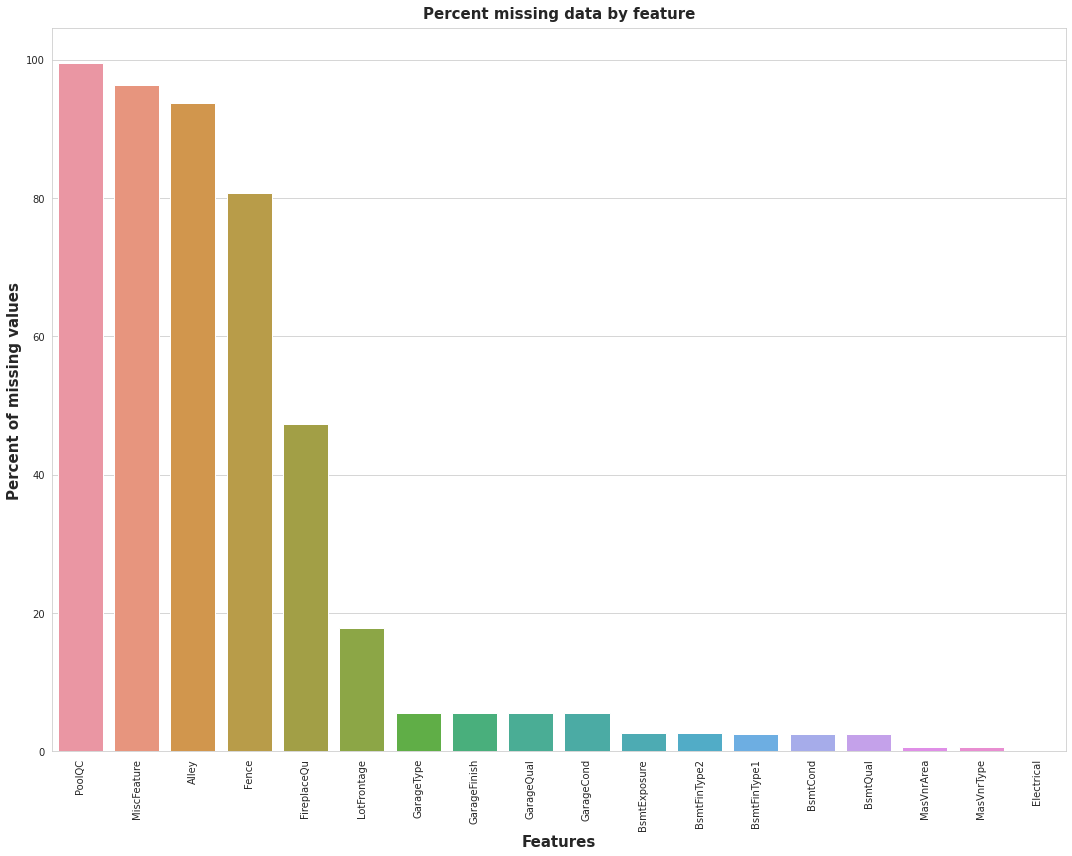

In [16]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_df.index, y=missing_df['NA Percentage']);
plt.xlabel('Features', fontsize=15);
plt.ylabel('Percent of missing values', fontsize=15);
plt.title('Percent missing data by feature', fontsize=15);

### Handle Missing Value
Handling missing values now will make the feature engineering go more smoothly. As a start we will deal with features with null value discovered in the dataset individually.

* Pool quality feature (PoolQC)   
We would fill all missing values with 'None' since the NAN values here simply represents that the house does not have a pool.

* Miscellaneous (MiscFeature)     
It represents Miscellaneous feature not covered in other categories. As PoolQC feature we will fill all missing values with 'None'.

* Alley access (Alley)      
It represents Type of alley access so we will fill all missing values with 'None'.

* Fence quality (Fence)   
We will fill all missing values with 'None'.

* Fireplace quality (FireplaceQu)    
We would fill all missing values with most frequently used value.

* LotFrontage     
Here we would first fill all missing values by taking the mean of the LotFrontage values of all groups having the same values of 1stFlrSF. This is because LotFrontage has a high correlation with 1stFlrSF. However, there can be cases where all the LotFrontage values corresponding to a particular 1stFlrSF value can be missing. To tackle such cases we would then fill it by using interpolate function of pandas to fill missing values linearly.

* Garage (GarageType, GarageFinish, GarageQual, GarageCond)   
No garage? so we will fill all missing values with 'None'.

* Basement (BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond,BsmtQual)  
No basement? so we will fill all missing values with 'None'.

* Masonry veneer (MasVnrArea, MasVnrType)  
It represents Type of Masonry veneer so we will fill all missing values with 'None' forMasVnrType feature and 0 for MasVnrArea feature.

* Electrical system (Electrical)    
We would fill all missing values with most frequently used value.

Otherwise, for categorical features we will use most frequently and foe numerical features

##### Other ideas:
    - replace infinity values with null values.
    - remove rows with missing target, separate target from predictors.

In [17]:
def ImputeData(df, name):
    from sklearn.impute import KNNImputer
    
    numerical_df = df.select_dtypes(include='number')
    imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    imputer.fit(numerical_df)
    X_transformed = imputer.transform(numerical_df)
    df_miss = pd.DataFrame(
        X_transformed, 
        columns = numerical_df.columns
    )
    #all_data[col_to_impute] = df_miss[col_to_impute]
    return df_miss[name]

ImputeData(df, 'LotFrontage')

0      65.000
1      80.000
2      68.000
3      60.000
4      84.000
        ...  
1455   62.000
1456   85.000
1457   66.000
1458   68.000
1459   75.000
Name: LotFrontage, Length: 1460, dtype: float64

In [18]:
def Impute(df):
    X = df.copy()
    #print(f"Null Columns are { X.columns[ X.isnull().any() ].tolist()}")
    
    # Remove rows with missing target, separate target from predictors
    #print( df_train.SalePrice.isnull().sum() )
    #X.dropna(axis=0, subset=['SalePrice'], inplace=True)
    
    # Replace infinity values with null values
    #print( np.isfinite(X.all()).sum() )
    #X.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # MasVnrArea feature
    X['MasVnrArea'].fillna(0, inplace=True)
    
    # LotFrontage feature
    X['LotFrontage'].fillna(
        X.groupby('1stFlrSF')['LotFrontage'].transform('mean'), 
        inplace = True
    )
    X['LotFrontage'].interpolate(
        method = 'linear',
        inplace = True
    )

    for name in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'LotFrontage', 'GarageType',\
                 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2',\
                 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType']: 
        X[name].fillna('None', inplace=True)
    
    for name in X.select_dtypes(include=['number']).columns:
        # fill nan with mean 
        X[name].fillna(df.mean(axis=0)[name], inplace=True)
        
    for name in X.select_dtypes(include=np.object).columns:
        # including 'FireplaceQu', 'Electrical' features
        # fill nan with most frequency
        most_frequently = X[name].value_counts().index[0]
        X[name].fillna(most_frequently, inplace=True)
        
    # check if no null value left
    assert(X.isnull().sum().sum() == 0)
    #print( np.isfinite(X.all()).sum() )
    #assert(np.isfinite(X.all()).sum() == 0) 
     
    return X

df = Impute(df)

### Show categorical data description

In [19]:
df_desc = df.describe(include=np.object).T
df_desc['describe'] = df_desc.index.map(data_description)
df_desc['categories'] = pd.DataFrame({
        name: ', '.join(df[name].unique().tolist()) 
        for name in df.select_dtypes(exclude='number').columns.tolist()
    }, index=['categories']).T
df_desc

,count,unique,top,freq,describe,categories
MSZoning,1460,5,RL,1151,The general zoning classification,"RL, RM, C (all), FV, RH"
Street,1460,2,Pave,1454,Type of road access,"Pave, Grvl"
Alley,1460,3,None,1369,Type of alley access,"None, Grvl, Pave"
LotShape,1460,4,Reg,925,General shape of property,"Reg, IR1, IR2, IR3"
LandContour,1460,4,Lvl,1311,Flatness of the property,"Lvl, Bnk, Low, HLS"
Utilities,1460,2,AllPub,1459,Type of utilities available,"AllPub, NoSeWa"
LotConfig,1460,5,Inside,1052,Lot configuration,"Inside, FR2, Corner, CulDSac, FR3"
LandSlope,1460,3,Gtl,1382,Slope of property,"Gtl, Mod, Sev"
Neighborhood,1460,25,NAmes,225,Physical locations within Ames city limits,"CollgCr, Veenker, Crawfor, NoRidge, Mitchel, Somerst, NWAmes, OldTown, BrkSide, Sawyer, NridgHt, NAmes, SawyerW, IDOTRR, MeadowV, Edwards, Timber, Gilbert, StoneBr, ClearCr, NPkVill, Blmngtn, BrDale, SWISU, Blueste"
Condition1,1460,9,Norm,1260,Proximity to main road or railroad,"Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, PosA, RRNe"


#### Dealing with skewed features¶

We shall use Box Cox transformation to reduce the skewedness of skewed features. First we look for the highly skewed features.

In [20]:
df_numerical = df.select_dtypes(include=np.number)
skewness = df_numerical.apply(lambda x: stats.skew(x)).sort_values(ascending=False)

skewness_df = pd.DataFrame({'Skewness': skewness})
skewness_df.head(10)

,Skewness
MiscVal,24.452
PoolArea,14.813
LotArea,12.195
3SsnPorch,10.294
LowQualFinSF,9.002
KitchenAbvGr,4.484
BsmtFinSF2,4.251
ScreenPorch,4.118
BsmtHalfBath,4.099
EnclosedPorch,3.087


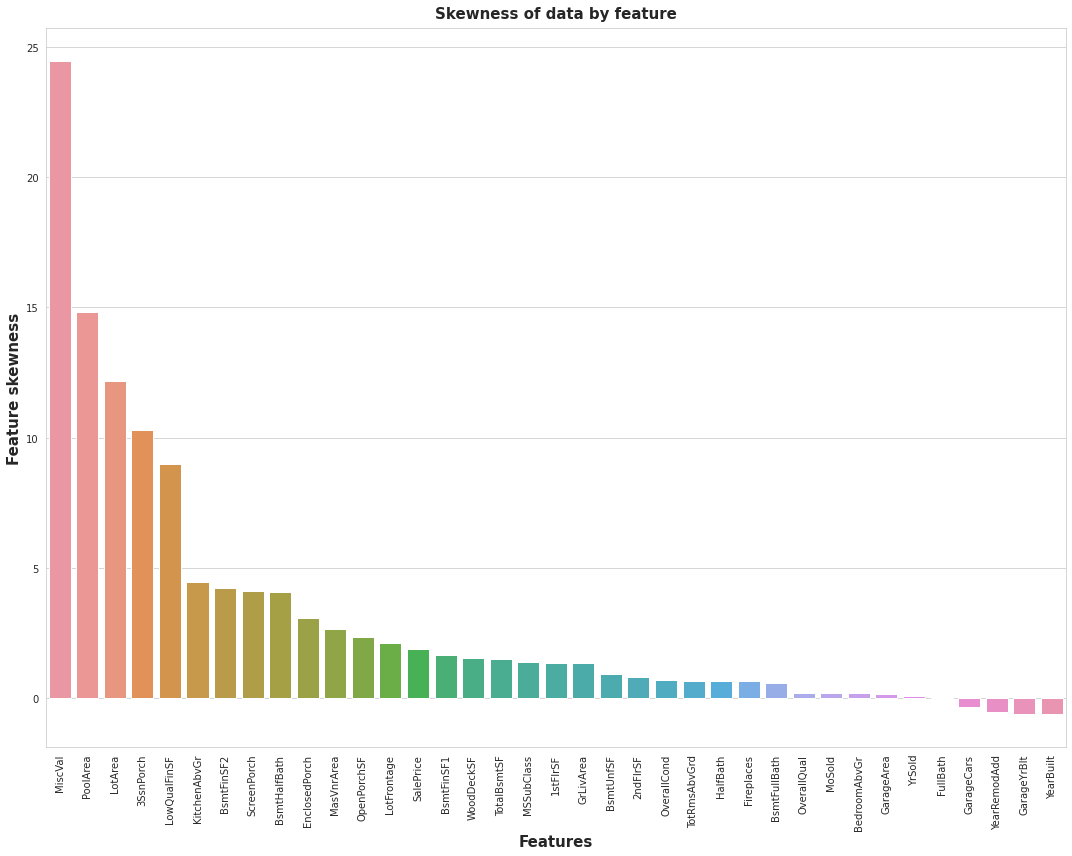

In [21]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=skewness_df.index, y=skewness_df.Skewness);
plt.xlabel('Features', fontsize=15);
plt.ylabel('Feature skewness', fontsize=15);
plt.title('Skewness of data by feature', fontsize=15);

#### Using Scipy for Box Cox transformation

We shall use Box-Cox transformation on the features with high "skewness". We shall use scipy's boxcox1p function, in essence computing a 1+x Box-Cox transformation. We'll use a value of lambda of 0.15.

Our threshold for "skewness" that necessitates transforamtion is 0.75.

In [22]:
(abs(skewness) > 0.75).value_counts()

True     22
False    15
dtype: int64

In [23]:
boxcox_features = skewness_df[np.abs(skewness_df['Skewness'])>0.75].index
print(boxcox_features)
for col in boxcox_features:
    df.loc[:, col] = special.boxcox1p(df[col], 0.15)

Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage',
       'SalePrice', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', 'MSSubClass',
       '1stFlrSF', 'GrLivArea', 'BsmtUnfSF', '2ndFlrSF'],
      dtype='object')


In [24]:
def modify_skewness(df, lam=0.15):
    X = df.copy()
    df_numerical = X.select_dtypes(include=np.number)
    skewness = df_numerical.apply(lambda x: stats.skew(x)).sort_values(ascending=False)

    skewness_df = pd.DataFrame({'Skewness': skewness})
    boxcox_features = skewness_df[np.abs(skewness_df['Skewness'])>0.75].index
    print(boxcox_features)
    for col in boxcox_features:
        X.loc[:, col] = special.boxcox1p(X[col], lam)
    return X

modify_skewness(df)

Index(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'KitchenAbvGr',
       'BsmtHalfBath', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch', 'LotArea',
       'BsmtUnfSF', 'TotalBsmtSF'],
      dtype='object')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,5.685,RL,5.831,3.799,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000,None,None,None,0.000,2,2008,WD,Normal,35.191
2,3.859,RL,6.221,3.837,Pave,None,Reg,Lvl,AllPub,FR2,...,0.000,None,None,None,0.000,5,2007,WD,Normal,34.329
3,5.685,RL,5.915,3.885,Pave,None,IR1,Lvl,AllPub,Inside,...,0.000,None,None,None,0.000,9,2008,WD,Normal,35.629
4,5.969,RL,5.685,3.835,Pave,None,IR1,Lvl,AllPub,Corner,...,0.000,None,None,None,0.000,2,2006,WD,Abnorml,32.763
5,5.685,RL,6.315,3.956,Pave,None,IR1,Lvl,AllPub,FR2,...,0.000,None,None,None,0.000,12,2008,WD,Normal,36.346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,5.685,RL,5.744,3.779,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000,None,None,None,0.000,8,2007,WD,Normal,34.106
1457,3.859,RL,6.338,3.932,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000,None,MnPrv,None,0.000,2,2010,WD,Normal,35.236
1458,5.969,RL,5.860,3.819,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000,None,GdPrv,Shed,3.428,5,2010,WD,Normal,36.761


# Outliers Treatment

    - Flooring and Capping: quantile-based technique.
    - Trimming: remove and completely drop all the outliers.
    - Replacing outliers: with the mean, median, mode, or other values. 'adviced not to use mean values'
   

#### Remove all rows that have outliers in at least one column    

* For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.
* It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold.
* all(axis=1) ensures that for each row, all column satisfy the constraint.
    Finally, the result of this condition is used to index the dataframe.


In [25]:
from scipy import stats
from time import time

standard_deviations = 3

#outliers = df[ df.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations).all(axis=1) ]
#outliers = df[ ( np.abs( stats.zscore( df ) ) < standard_deviations ).all(axis=1) ]
# drop outliers columns, first we add 
#pd.concat([df, outliers]).drop_duplicates(keep=False)

# Select and remove outliers from dtata
def remove_outliers(df, standard_deviations=3):
    X = df.copy()
    z_score = stats.zscore( X.select_dtypes(include='number') )
    return X[ ~(  np.abs(z_score)  < standard_deviations ).all(axis=1) ]

remove_outliers(df, standard_deviations=3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2,3.859,RL,6.221,19.712,Pave,None,Reg,Lvl,AllPub,FR2,...,0.000,None,None,None,0.000,5,2007,WD,Normal,34.329
4,5.969,RL,5.685,19.692,Pave,None,IR1,Lvl,AllPub,Corner,...,0.000,None,None,None,0.000,2,2006,WD,Abnorml,32.763
6,5.357,RL,6.338,21.282,Pave,None,IR1,Lvl,AllPub,Inside,...,0.000,None,MnPrv,Shed,11.148,10,2009,WD,Normal,32.889
8,5.685,RL,5.774,20.024,Pave,None,IR1,Lvl,AllPub,Corner,...,0.000,None,None,Shed,9.392,11,2009,WD,Normal,34.930
9,5.357,RM,5.392,17.990,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000,None,None,None,0.000,4,2008,WD,Abnorml,32.323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,6.338,RL,5.969,19.189,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000,None,None,None,0.000,5,2007,WD,Normal,32.282
1450,7.873,RM,3.933,13.368,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000,None,None,None,0.000,8,2006,WD,Abnorml,30.357
1451,6.448,RL,5.685,19.458,Pave,None,Reg,Lvl,AllPub,FR2,...,0.000,None,None,None,0.000,9,2009,WD,Normal,32.592


Let's remove the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

Think this deletion is safe to do as there are only 2 points and they seem to be abnormal, possibly data error.

In [26]:
df[(df['OverallQual']>9) & (df['SalePrice']<220000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
59,5.685,RL,5.860,21.152,Pave,None,IR2,HLS,AllPub,CulDSac,...,0.000,None,None,None,0.000,10,2006,New,Partial,40.133
186,6.099,RM,6.448,23.396,Pave,None,IR2,Lvl,AllPub,Inside,...,0.000,None,GdPrv,None,0.000,6,2006,WD,Normal,40.693
225,3.859,RL,6.714,21.088,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000,None,None,None,0.000,6,2009,WD,Normal,39.247
390,5.685,RL,6.574,20.769,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000,None,None,None,0.000,8,2008,New,Partial,39.926
441,3.859,RL,6.752,21.658,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000,None,None,None,0.000,4,2009,WD,Normal,41.812
516,3.859,RL,6.533,20.684,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000,None,None,None,0.000,9,2009,New,Partial,39.538
524,5.685,RL,7.185,26.020,Pave,None,IR1,Bnk,AllPub,Inside,...,0.000,None,None,None,0.000,10,2007,New,Partial,34.439
584,6.099,RM,6.099,21.096,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000,None,None,None,0.000,7,2008,WD,Normal,38.073
592,5.685,RL,6.595,21.089,Pave,None,IR1,Lvl,AllPub,Corner,...,0.000,None,None,None,0.000,6,2009,ConLI,Normal,40.341


In [27]:
df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [28]:
def delete_uninformative(df):
    # extremely large areas for very low prices
    X = df.copy()
    X = X.drop(
        X[
            (X['OverallQual']>9) & (X['SalePrice']<220000)
        ].index
    )
    X = X.drop(
        X[
            (X['GrLivArea']>4000) & (X['SalePrice']<300000)
        ].index
    )
    return X

df = delete_uninformative(df)# dropped 2 rows from training data

In [29]:
# filtering on a column by Interquartile Range(IQR)
def Interquartile_Range(df):
    iqr = pd.DataFrame({
        'Q1': df.quantile(0.25), # first quantile,
        'Q3': df.quantile(0.75), # second quantile,
    })
    iqr['IQR'] = iqr.Q3 - iqr.Q1
    return iqr


def outlier_detect_new(df, name, iqr_df, whisker_width=1.5):
    """Remove outliers from a dataframe by column, including optional 
       whiskers, removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    lower_bound = iqr_df.Q1[name] - whisker_width * iqr_df.IQR[name]
    upper_bound = iqr_df.Q3[name] + whisker_width * iqr_df.IQR[name]
    return df[ 
        ((df[name] < lower_bound) | (df[name] > upper_bound)) 
    ]

def lower_outlier(df, name, iqr_df, whisker_width=1.5):
    lower_bound =  iqr_df.Q1[name] - whisker_width * iqr_df.IQR[name]
    return df[ ( df[name] < lower_bound ) ]

def upper_outlier(df, name, iqr_df, whisker_width=1.5):
    upper_bound =  iqr_df.Q3[name] + whisker_width * iqr_df.IQR[name]
    return df[ ( df[name] < upper_bound ) ]

In [30]:
# Remove rows with missing target, separate target from predictors
target = df.SalePrice
feaures = df.drop(['SalePrice'], axis=1)

### Encode the Statistical Data Type
Here we will use one hot encoder for the features that has high cardinality columns and the features with unordered categories.
otherwise we will use label encoder. maximum cardinality in traing dataset id 25 for "Neighborhood" column
* "Cardinality" means the number of unique values in a column


#### Label Encoder Methods

* pd.factorize()
* np.where(series == 'yes', 1, 0)
* pd.Categorical/astype('category'): series.astype('category').cat.codes
* series.replace({'yes' : 1, 'no' : 0})
* series.replace({r'^(?!yes).*$' : 0}, regex=True).astype(bool).astype(int)
* dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [31]:
def label_encode(df):
    X = df.copy()
    for name in X.select_dtypes(include=np.object):
        X[name], _ = X[name].factorize()
    return X

In [32]:
#  Avoid OneHot for high cardinality columns

#print( df.select_dtypes(include=np.object).nunique().max() )  # 25
    
def Encoder(df, max_number=15 ):
    X = df.copy()
    #print(X.select_dtypes(include=np.object).nunique())
    
    #for colname in X.select_dtypes(["category"]):
    #    X[colname] = X[colname].cat.codes
    
    for name in X.select_dtypes(include=np.object):
        if X[name].nunique() > max_number: # and ordered features
            X[name], _ = X[name].factorize()
            
        else:
            X = pd.get_dummies(X, prefix=[f"{name}_"], columns=[name])
            
    return X

df = Encoder(df, max_number=5)
Encoder(df, max_number=5)

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Fence__GdPrv,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__None,MiscFeature__Gar2,MiscFeature__None,MiscFeature__Othr,MiscFeature__Shed,MiscFeature__TenC
Id,,,,,,,,,,,,,,,,,,,,,
1,5.685,5.831,19.212,0,0,0,0,7,5,2003,...,0,0,0,0,1,0,1,0,0,0
2,3.859,6.221,19.712,1,1,0,1,6,8,1976,...,0,0,0,0,1,0,1,0,0,0
3,5.685,5.915,20.347,0,0,0,0,7,5,2001,...,0,0,0,0,1,0,1,0,0,0
4,5.969,5.685,19.692,2,0,0,0,7,5,1915,...,0,0,0,0,1,0,1,0,0,0
5,5.685,6.315,21.325,3,0,0,0,8,5,2000,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,5.685,5.744,18.961,17,0,0,0,6,5,1999,...,0,0,0,0,1,0,1,0,0,0
1457,3.859,6.338,20.995,6,0,0,1,6,6,1978,...,0,0,1,0,0,0,1,0,0,0
1458,5.969,5.860,19.476,2,0,0,0,7,9,1941,...,1,0,0,0,0,0,0,0,1,0


##  Feature Utility Metric
Use a metric called "mutual information" to compute a utility score for a feature, giving you an indication of how much potential the feature has.
It's a lot like correlation in that it measures a relationship between two quantities. 
The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

In [33]:
# All discrete features should now have integer dtypes
discrete_features = feaures.dtypes == int

In [34]:
def make_mi_scores(X, y):
    # All discrete features should now have integer dtypes
    X = label_encode(X)
    #discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    discrete_features = (X.dtypes == int) 
    
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(feaures, target)

Here we create bar plot based on mutual information scores.

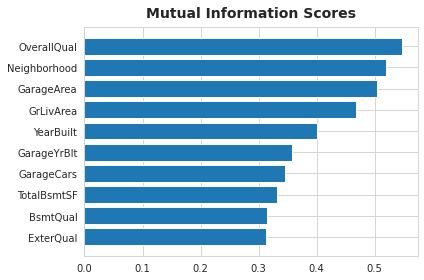

In [35]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plot_mi_scores(mi_scores[:10])

Now we have a number of features that are highly informative. the top scoring features will usually pay-off the most during feature development, so it could be a good idea to focus efforts on those. On the other hand, training on uninformative features can lead to overfitting. So, the features with 0.0 scores we'll drop entirely.

In [36]:
def drop_uninformative(df, mi_scores, threshold=0.0):
    return df.loc[:, mi_scores > threshold]

drop_uninformative(feaures, mi_scores, 0.0)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,5.685,RL,5.831,19.212,None,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0.000,5.715,0.000,0.000,0.000,None,None,WD,Normal
2,3.859,RL,6.221,19.712,None,Reg,Lvl,AllPub,FR2,Gtl,...,Y,9.010,0.000,0.000,0.000,0.000,None,None,WD,Normal
3,5.685,RL,5.915,20.347,None,IR1,Lvl,AllPub,Inside,Gtl,...,Y,0.000,5.053,0.000,0.000,0.000,None,None,WD,Normal
4,5.969,RL,5.685,19.692,None,IR1,Lvl,AllPub,Corner,Gtl,...,Y,0.000,4.745,8.798,0.000,0.000,None,None,WD,Abnorml
5,5.685,RL,6.315,21.325,None,IR1,Lvl,AllPub,FR2,Gtl,...,Y,8.014,6.315,0.000,0.000,0.000,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,5.685,RL,5.744,18.961,None,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0.000,4.970,0.000,0.000,0.000,None,None,WD,Normal
1457,3.859,RL,6.338,20.995,None,Reg,Lvl,AllPub,Inside,Gtl,...,Y,9.385,0.000,0.000,0.000,0.000,MnPrv,None,WD,Normal
1458,5.969,RL,5.860,19.476,None,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0.000,5.685,0.000,0.000,0.000,GdPrv,Shed,WD,Normal


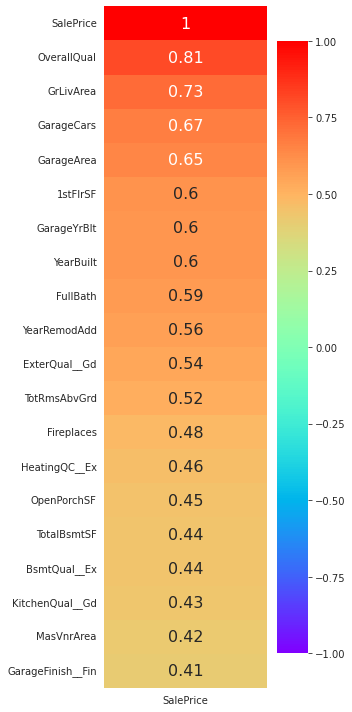

In [37]:
top_features = df.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False)[:20]

plt.figure(figsize=(5,10));
sns.heatmap(top_features, cmap='rainbow', annot=True, annot_kws={"size": 16}, vmin=-1);

# Creating Features
 Here we apply some strategies for creating features in Pandas.
 
 #### Creating features strategies
* Mathematical Transforms
* Counts
* Building-Up and Breaking-Down Features
* Group Transforms
* K-means
* PCA

In [38]:
df_desc = feaures.describe(include=['number']).T
df_desc['describe'] = df_desc.index.map(data_description)

df_desc.dropna() # drop new columns 

,count,mean,std,min,25%,50%,75%,max,describe
MSSubClass,1442.000,5.221,1.245,3.859,3.859,5.357,5.969,7.991,The building class
LotFrontage,1442.000,5.876,0.598,3.933,5.679,5.942,6.221,9.126,Linear feet of street connected to property
LotArea,1442.000,19.527,2.022,12.879,18.753,19.633,20.428,35.391,Lot size in square feet
OverallQual,1442.000,6.051,1.321,1.000,5.000,6.000,7.000,9.000,Overall material and finish quality
OverallCond,1442.000,5.576,1.111,1.000,5.000,5.000,6.000,9.000,Overall condition rating
YearBuilt,1442.000,1971.010,30.042,1872.000,1954.000,1972.000,2000.000,2010.000,Original construction date
YearRemodAdd,1442.000,1984.629,20.656,1950.000,1966.000,1993.000,2004.000,2010.000,Remodel date
MasVnrArea,1442.000,3.208,4.084,0.000,0.000,0.000,7.613,13.497,Masonry veneer area in square feet
BsmtFinSF1,1442.000,7.038,5.123,0.000,0.000,9.581,11.148,14.466,Type 1 finished square feet
BsmtFinSF2,1442.000,1.058,3.002,0.000,0.000,0.000,0.000,13.250,Type 2 finished square feet


In [39]:
def mathematical_transforms(df):
    X = pd.DataFrame(
        index = df.index
    )  # dataframe to hold new features
    X["LivLotRatio"] = df.GrLivArea / df.LotArea  # create a single null value
    X["Spaciousness"] = (df['1stFlrSF'] + df['2ndFlrSF']) / df.TotRmsAbvGrd # create a single null value
    X["Feature1"] = df.GrLivArea + df.TotalBsmtSF
    X["Feature2"] = df.YearRemodAdd * df.TotalBsmtSF    
    #X['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'])
    X['Total_Bath'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
    X['Total_Porch_Area'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])
    X['SqFtPerRoom'] = df['GrLivArea'] / (df['TotRmsAbvGrd'] + df['FullBath'] + df['HalfBath'] + df['KitchenAbvGr'])
    return X

#df.join(mathematical_transforms(df))#.isnull().sum().sum() # 2 null values
mathematical_transforms(df)

,LivLotRatio,Spaciousness,Feature1,Feature2,Total_Bath,Total_Porch_Area,SqFtPerRoom
Id,,,,,,,
1,0.713,2.922,25.392,23420.323,3.500,5.715,1.168
2,0.649,2.132,25.585,25277.538,2.365,9.010,1.465
3,0.680,3.936,25.724,23807.862,3.500,5.053,1.422
4,0.696,3.338,25.065,22367.566,2.000,13.543,1.571
5,0.679,2.754,26.991,25021.176,3.500,14.329,1.137
...,...,...,...,...,...,...,...
1456,0.716,3.302,25.575,23980.597,2.500,4.970,1.266
1457,0.681,2.042,27.681,26610.587,3.000,9.385,1.469
1458,0.754,2.794,27.208,25131.395,2.000,5.685,1.251


In [40]:
def interactions(df):
    X = pd.get_dummies(df.BldgType, prefix="Bldg") # deleted after using one hot
    X = X.mul(df.GrLivArea, axis=0)
    return X

#df.join(interactions(df))#.isnull().sum().sum()
#interactions(df)

In [41]:
def counts(df):
    X = pd.DataFrame(
         index=df.index
    )
    X["PorchTypes"] = df[[
        "WoodDeckSF",
        "OpenPorchSF",
        "EnclosedPorch",
        "3SsnPorch",
        "ScreenPorch",
    ]].gt(0.0).sum(axis=1)
    return X

#df.join(counts(df)).isnull().sum().sum()#
counts(df)

,PorchTypes
Id,
1,1
2,1
3,1
4,2
5,2
...,...
1456,1
1457,1
1458,1


In [42]:
def Building_Up_Breaking_Down(df, col):
    X = pd.DataFrame(
        df.index
    )
    #X[f"new{col}"] = df[col].str.split("_", n=1, expand=True)[0]
    return X

#df.join(Building_Up_Breaking_Down(df, col=''))#.isnull().sum().sum()
#Building_Up_Breaking_Down(df, col='')

In [43]:
def group_transforms(df):
    X = pd.DataFrame()
    X["MedNhbdArea"] = df.groupby("Neighborhood")["GrLivArea"].transform("median")
    return X

#df.join(group_transforms(df))#.isnull().sum().sum()
group_transforms(df)

,MedNhbdArea
Id,
1,13.303
2,13.175
3,13.303
4,13.711
5,14.758
...,...
1456,13.484
1457,13.616
1458,13.711


#### KMeans
An nsupervised algorithm we used to create features was k-means clustering. We saw that you could either use the cluster labels as a feature (a column with 0, 1, 2, ...) or you could use the distance of the observations to each cluster. We saw how these features can sometimes be effective at untangling complicated spatial relationships.

In [44]:
cluster_features = [
    "LotArea",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "GrLivArea",
]

In [45]:
def cluster_labels(df, features, n_clusters=20):
    X = df.copy()
    X_scaled = X.loc[:, features]
    X_scaled = Standalizer(X_scaled)
    kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=0)
    X_new = pd.DataFrame(index=X.index)
    X_new["Cluster"] = kmeans.fit_predict(X_scaled)
    return X_new

df.join(cluster_labels(df, cluster_features)).isnull().sum().sum()
cluster_labels(df, cluster_features)

,Cluster
Id,
1,10
2,15
3,1
4,10
5,17
...,...
1456,10
1457,13
1458,5


In [46]:
def cluster_distance(df, features, n_clusters=20):
    X = df.copy()
    X_scaled = X.loc[:, features]
    X_scaled = Standalizer(X_scaled)
    kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=0)
    # Label features and join to dataset
    X_cd = kmeans.fit_transform(X_scaled)
    X_cd = pd.DataFrame(
        X_cd, 
        columns = [f"Centroid_{i}" for i in range(X_cd.shape[1])],
        index = X.index
    )
    return X_cd

df.join(cluster_distance(df, cluster_features)).isnull().isnull().sum().sum()
cluster_distance(df, cluster_features)

,Centroid_0,Centroid_1,Centroid_2,Centroid_3,Centroid_4,Centroid_5,Centroid_6,Centroid_7,Centroid_8,Centroid_9,Centroid_10,Centroid_11,Centroid_12,Centroid_13,Centroid_14,Centroid_15,Centroid_16,Centroid_17,Centroid_18,Centroid_19
Id,,,,,,,,,,,,,,,,,,,,
1,2.739,0.988,3.132,5.931,2.061,2.064,2.932,2.996,7.621,3.474,0.284,2.579,4.063,3.928,5.824,2.694,1.055,1.080,2.908,3.078
2,1.052,2.703,1.286,6.121,3.426,3.031,3.579,1.556,7.120,2.829,2.469,0.740,2.956,2.484,6.077,0.293,2.679,2.628,1.760,4.279
3,2.682,0.622,2.919,6.095,2.672,1.756,2.414,3.193,7.016,3.852,0.680,2.670,3.558,3.601,5.841,2.614,1.468,0.672,3.094,3.692
4,2.603,0.873,2.870,5.794,2.356,1.803,2.615,2.938,7.308,3.586,0.364,2.489,3.726,3.620,5.557,2.496,1.272,0.772,2.916,3.408
5,3.213,1.489,2.733,6.729,3.534,1.000,1.301,3.551,6.380,4.782,1.624,3.245,3.157,3.034,6.092,2.830,2.582,0.670,3.896,4.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2.578,1.191,2.832,6.006,2.001,1.905,2.849,2.660,7.622,3.364,0.196,2.344,3.955,3.653,5.858,2.408,1.186,1.018,2.772,3.119
1457,3.224,3.818,1.145,7.308,4.927,2.654,2.677,2.873,6.312,5.137,3.626,3.108,2.625,0.353,6.434,2.122,4.406,3.094,4.146,6.135
1458,3.454,1.906,2.787,6.754,2.946,0.636,1.763,3.157,7.254,4.626,1.423,3.240,3.867,3.154,6.101,2.865,2.546,0.753,3.941,4.261


#### PCA
An unsupervised model we used for feature creation. It could be used to decompose the variational structure in the data. The PCA algorithm gave us loadings which described each component of variation, and also the components which were the transformed datapoints. The loadings can suggest features to create and the components we can use as features directly.

In [47]:
pca_features = [
    "GarageArea",
    "YearRemodAdd",
    "TotalBsmtSF",
    "GrLivArea",
]

In [48]:
def pca_components(df, features, standardize=True):
    X = df.copy()
    X = X.loc[:, features]
    # Standardize
    if standardize: Standalizer(X)
    # Create principal components
    pca_model = PCA()
    X_pca = pca_model.fit_transform(X)
    
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(
        X_pca, 
        columns = component_names,
        index = X.index
    )
    
    # Create loadings
    loadings = pd.DataFrame(
        pca_model.components_.T,  # transpose the matrix of loadings
        columns = component_names,  # so the columns are the principal components
        index = X.columns,  # and the rows are the original features
    )
    
    return pca_model, X_pca, loadings

pca_model, X_pca, loadings = pca_components(df, pca_features)
X_pca

,PC1,PC2,PC3,PC4
Id,,,,
1,80.691,-15.478,0.621,0.290
2,-8.220,8.326,-1.061,-0.358
3,140.617,-12.325,0.545,0.317
4,173.444,20.881,0.671,0.377
5,368.400,-2.143,0.413,0.559
...,...,...,...,...
1456,-7.359,-15.649,0.070,0.325
1457,32.190,-2.246,-1.455,0.964
1458,-215.004,-29.139,-0.943,1.697


pca n components: 4
pca  explained variance ratio: [9.91512521e-01 8.37627103e-03 9.52591273e-05 1.59491776e-05]


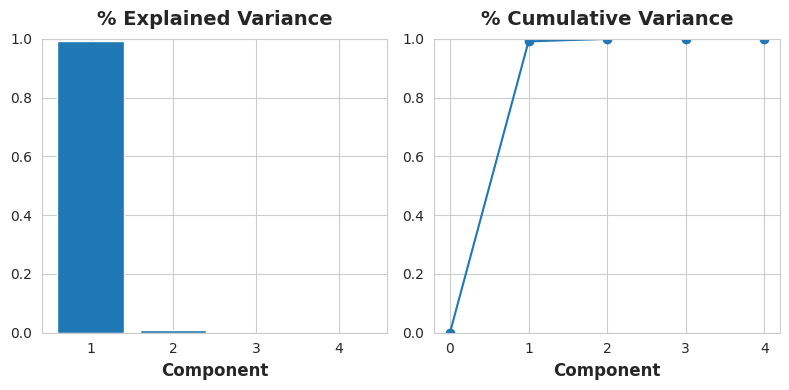

In [49]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    fig.set(figwidth=8, dpi=100)
    
    n = pca.n_components_
    print(f"pca n components: {pca.n_components_}")
    grid = np.arange(1, n + 1)
    
    # Explained variance
    evr = pca.explained_variance_ratio_
    print(f"pca  explained variance ratio: {pca.explained_variance_ratio_}")
    
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    #return axs

plot_variance(pca_model, width=8, dpi=100)

## some ideas for other transforms you could explore:


#### Interactions between the quality Qual and condition Cond features. 
    OverallQual, for instance, was a high-scoring feature. 
    You could try combining it with OverallCond by converting both to integer type 
    and taking a product.

#### Square roots of area features. This would convert units of square feet to just feet.

#### Interactions between numeric and categorical features 
that describe the same thing. 
You could look at interactions between BsmtQual and TotalBsmtSF, for instance.

#### Other group statistics in Neighboorhood.
We did the median of GrLivArea. Looking at mean,
std, or count could be interesting. You could also try combining the group statistics with
other features. Maybe the difference of GrLivArea and the median is important?

# Quantile binning

    The only 2-quantile is called the median
    The 3-quantiles are called tertiles or terciles → T
    The 4-quantiles are called quartiles → Q; the difference between upper and lower quartiles is also called the interquartile range, midspread or middle fifty → IQR = Q3 −  Q1
    The 5-quantiles are called quintiles → QU
    The 6-quantiles are called sextiles → S
    The 7-quantiles are called septiles
    The 8-quantiles are called octiles
    The 10-quantiles are called deciles → D
    The 12-quantiles are called duo-deciles or dodeciles
    The 16-quantiles are called hexadeciles → H
    The 20-quantiles are called ventiles, vigintiles, or demi-deciles → V
    The 100-quantiles are called percentiles → P
    The 1000-quantiles have been called permilles or milliles, but these are rare and largely obsolete

## Data Preprocessing Pipline

Before we can do any feature engineering, we need to preprocess the data to get it in a form suitable for analysis. we'll need to:

    Load: the data from CSV files
    Clean: the data to fix any errors or inconsistencies
    Encode: the statistical data type (numeric, categorical)
    Impute: any missing values
    
 After reading the CSV file, we'll apply three preprocessing steps, clean, encode, and impute, and then create the data splits: one (df_train) for training the model, and one (df_test) for making the predictions that you'll submit to the competition for scoring on the leaderboard.

In [50]:
def Data():
    # Read the data
    df_train = pd.read_csv("../input/train.csv", index_col=0)
    df_test = pd.read_csv("../input/test.csv", index_col=0)    
    #df_train = only_once_values(df_train) # apply this in traing dataset ONLY
    
    # delete_uninformative
    df_train = delete_uninformative(df_train)
    print(f"concatenate Done: {df_train.shape}")
    
    target = df_train.pop("SalePrice")
    
    df = pd.concat([df_train, df_test])
    print(f"concatenate Done: {df.shape}")

    # Preprocessing
    df = Clean(df)
    print(f"Clean Done: {df.shape}")
    
    df = Impute(df)
    print(f"Impute Done: {df.shape}")
    
    df = modify_skewness(df, lam=0.15)
    print(f"Modify skewness Done: {df.shape}")
    
    df = Encoder(df, max_number=5) 
    print(f"Encoder Done: {df.shape}")
    
    # split data
    df_train = df.loc[df_train.index, :]
    df_train['SalePrice'] = target
    df_test = df.loc[df_test.index, :]
    print(df_train.shape, df_test.shape)
    
    return df_train, df_test

#df_train, df_test = tqdm(Data())
#print('Null Values: ', df_train.isnull().sum().sum(), df_test.isnull().sum().sum())

## Create Features Pipline
Now we'll start developing our feature set.

To make our feature engineering workflow more modular, we'll define a function that will take a prepared dataframe and pass it through a pipeline of transformations to get the final feature set.

In [51]:
def create_features(df, df_test):
    X = df.copy()
    target = X.pop("SalePrice")
    
    mi_scores = make_mi_scores(X, target)
    
    # Combine splits if test data is given
    #
    # If we're creating features for test set predictions, we should
    # use all the data we have available. After creating our features,
    # we'll recreate the splits.
    X_test = df_test.copy()
    X = pd.concat([X, X_test])
    print(f"concatenate Done: {X.shape}")
    X_new = pd.DataFrame({}, index = X.index)
    
    #  Mutual Information
    X = drop_uninformative(X, mi_scores, 0.0)
    print(f"drop_uninformative Done: {X.shape}")
    print('Null Values: ', X.isnull().sum().sum())

    # Transformations
    X_new = X_new.join(mathematical_transforms(X))
    print(f"mathematical_transforms Done: {X.shape}")
    
    #X = X.join(interactions(X))
    #print(f"interactions Done: {X.shape}")
    
    X_new = X_new.join(counts(X))
    print(f"counts Done: {X.shape}")
    
    #X_new = X_new.join(Building_Up_Breaking_Down(X))
    #print(f"Building_Up_Breaking_Down Done: {X.shape}")

    X_new = X_new.join(group_transforms(X))
    print(f"group_transforms Done: {X.shape}")
    
    # Clustering
    X_new = X_new.join(cluster_labels(X, cluster_features, n_clusters=20))
    print(f"cluster_labels Done: {X.shape}")

    X_new = X_new.join(cluster_distance(X, cluster_features, n_clusters=20))
    print(f"cluster_distance Done: {X.shape}")

    # PCA
    X_new = X_new.join(pca_components(X, pca_features)[1])
    print(f"pca_components Done: {X.shape}")

    #X_new = X_new.join(indicate_outliers(X))
    
    X = X.join(X_new)
    
    X = Encoder(X, 15)
    print(f"Encoder Done: {X.shape}")
        
    # Scale
    #X = pd.DataFrame(MinMaxScaler().fit_transform(X), index=X.index, columns=X.columns)
    #print(f"scaler Done: {X.shape}")
    
    # ----- Reform splits -----
    X_test = X.loc[df_test.index, :]
    X.drop(X_test.index, inplace=True)
    print(f"drop_uninformative 2 Done: {X.shape}")
    
    X = remove_outliers(X, standard_deviations=1)
    target = target[X.index]
    
    mi_scores = make_mi_scores(X, target)
    X = drop_uninformative(X, mi_scores, 0.0)
    X_test = X_test[X.columns]
    
    return X, target, X_test

df_train, df_test = tqdm(Data())
print('Final shapes: ', df_train.shape, df_test.shape)
print('Null Values: ', df_train.isnull().sum().sum(), df_test.isnull().sum().sum())

features, target, df_test = tqdm(create_features(df_train, df_test))
print('Final shapes: ', features.shape, df_test.shape)
print('Null Values: ', features.isnull().sum().sum(), df_test.isnull().sum().sum())

concatenate Done: (1458, 80)
concatenate Done: (2917, 79)
Clean Done: (2917, 79)
Impute Done: (2917, 79)
Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'MSSubClass',
       '1stFlrSF', 'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF'],
      dtype='object')
Modify skewness Done: (2917, 79)
Encoder Done: (2917, 157)
(1458, 158) (1459, 157)


  0%|          | 0/2 [00:00<?, ?it/s]

Final shapes:  (1458, 158) (1459, 157)
Null Values:  0 0
concatenate Done: (2917, 157)
drop_uninformative Done: (2917, 137)
Null Values:  0
mathematical_transforms Done: (2917, 137)
counts Done: (2917, 137)
group_transforms Done: (2917, 137)
cluster_labels Done: (2917, 137)
cluster_distance Done: (2917, 137)
pca_components Done: (2917, 137)
Encoder Done: (2917, 171)
drop_uninformative 2 Done: (1458, 171)


  0%|          | 0/3 [00:00<?, ?it/s]

Final shapes:  (1458, 161) (1459, 161)
Null Values:  0 0


## Establish Baseline

Finally, let's establish a baseline score to judge our feature engineering against.

This function will compute the cross-validated RMSLE score for a feature set. We've used XGBoost for our model, but you might want to experiment with other models.

## Divide train dataset to train/validate

In [52]:
df_train, df_test = tqdm(Data())
features, target, df_test = tqdm(create_features(df_train, df_test))

train_features, validate_features, train_target, validate_target = train_test_split(
    features, 
    target, 
    test_size=0.25, 
    random_state=42
)

concatenate Done: (1458, 80)
concatenate Done: (2917, 79)
Clean Done: (2917, 79)
Impute Done: (2917, 79)
Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'MSSubClass',
       '1stFlrSF', 'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF'],
      dtype='object')
Modify skewness Done: (2917, 79)
Encoder Done: (2917, 157)
(1458, 158) (1459, 157)


  0%|          | 0/2 [00:00<?, ?it/s]

concatenate Done: (2917, 157)
drop_uninformative Done: (2917, 136)
Null Values:  0
mathematical_transforms Done: (2917, 136)
counts Done: (2917, 136)
group_transforms Done: (2917, 136)
cluster_labels Done: (2917, 136)
cluster_distance Done: (2917, 136)
pca_components Done: (2917, 136)
Encoder Done: (2917, 170)
drop_uninformative 2 Done: (1458, 170)


  0%|          | 0/3 [00:00<?, ?it/s]

## Hyperparameter Tuning

we do here some hyperparameter tuning with GradientBoostingRegressor.

In [53]:
param_grid = {
    #'fit_intercept':[True,False],
    'n_estimators': [100, 200, 300, 400, 500], 
    'learning_rate': [0.01, 0.05, 0.09, 0.1, 0.2, 0.9],
}
model_param_mod = GridSearchCV(
    estimator = GradientBoostingRegressor(),
    param_grid = param_grid, 
    n_jobs = -1
)

#model_param_mod.fit(train_features, train_target)
#print(model_param_mod.best_params_)

In [54]:
def basic_model(X1, y1, X2, y2):
    # Define model
    #model = XGBRegressor(n_estimators=200, learning_rate=0.09)
    #model = RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',n_estimators=200)
    #model = BaggingRegressor()
    #model = BayesianRidge()
    #model = Lasso(alpha=100)
    #model = ExtraTreesRegressor(n_estimators=200)
    model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05)
    
    model.fit(X1, y1)
    return model

model = basic_model(train_features, train_target, validate_features, validate_target)

In [55]:
validate_target_predictions = model.predict(validate_features).flatten()
print('MAE:', mean_absolute_error(validate_target, validate_target_predictions))
error = validate_target, validate_target_predictions

MAE: 14714.666864582621


#### regresion between true and predicted prices

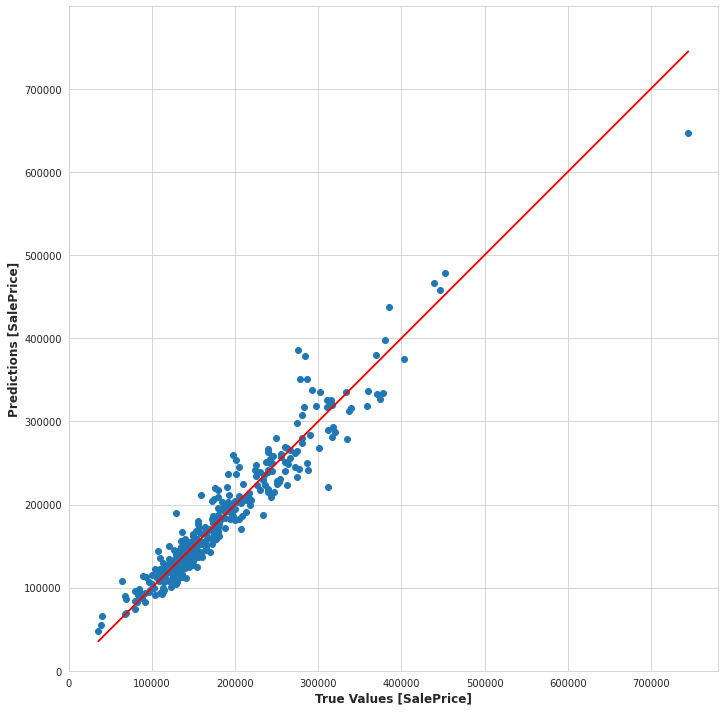

In [56]:
plt.figure(figsize=(14, 10))
plt.scatter(validate_target, validate_target_predictions)
plt.xlabel('True Values [SalePrice]')
plt.ylabel('Predictions [SalePrice]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
## Perfect predictions
plt.plot(validate_target, validate_target,'r');

#### It looks like our model predicts reasonably well. Let’s take a look at the error distribution.

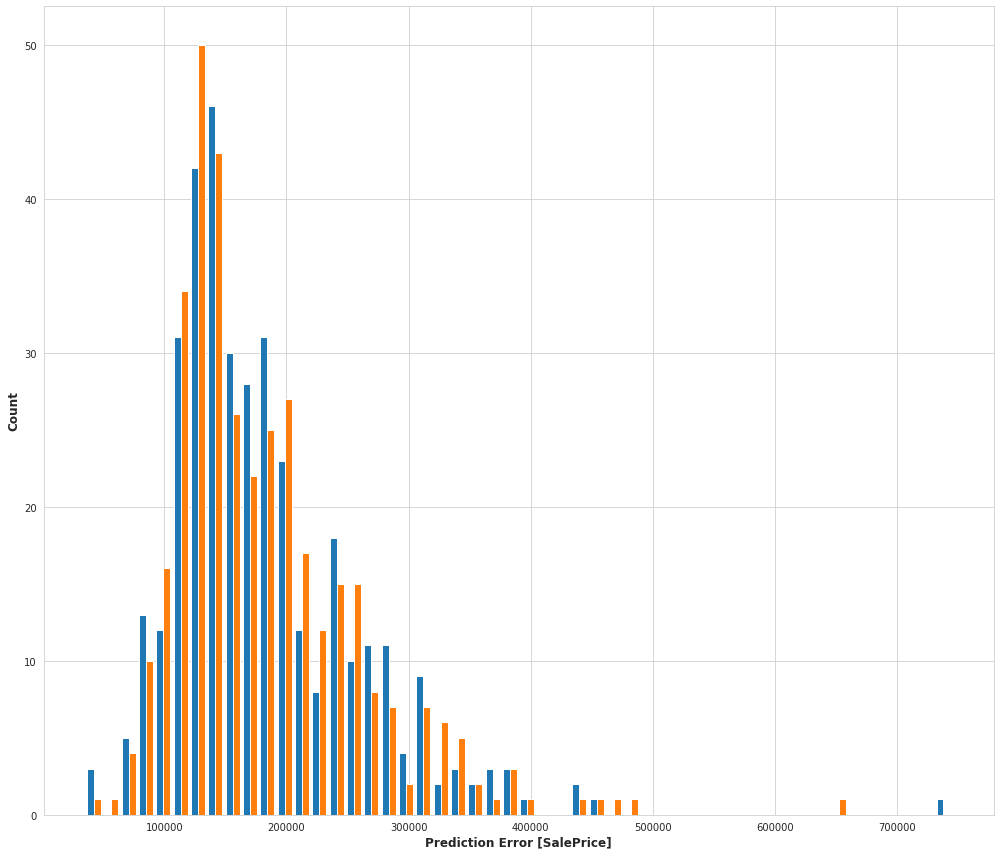

In [57]:
plt.figure(figsize=(14, 12))
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [SalePrice]")
_ = plt.ylabel("Count")

In [58]:
def Save_Submit(model, df):
    output = pd.DataFrame({
        'Id': df.index,
        'SalePrice': model.predict(df).flatten()
    })
    output.to_csv('submission.csv', index=False)
    print("Saved!")
    
model = GradientBoostingRegressor(learning_rate=0.05, n_estimators=300).fit(features, target)
Save_Submit(model, df_test)

Saved!
